Lab1

In [34]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
path = 'D:/P/ДСБД/dds_datasets/'
extension = '.csv'
files = [file for file in os.listdir(path) if file.endswith(extension)]
dfs = []
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df.fillna(0)
print(df)

          Age  Gender  Impressions  Clicks  Signed_In
0          36       0            3       0          1
1          73       1            3       0          1
2          30       0            3       0          1
3          49       1            3       0          1
4          47       1           11       0          1
...       ...     ...          ...     ...        ...
14905860    0       0            6       0          0
14905861    0       0            1       0          0
14905862   63       1            0       0          1
14905863   50       0           16       0          1
14905864   67       0            7       0          1

[14905865 rows x 5 columns]


In [36]:
age_group = ['< 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
condlist = [
    (df['Age'] < 18),
    (df['Age'] >= 18) & (df['Age'] < 25),
    (df['Age'] >= 25) & (df['Age'] < 35),
    (df['Age'] >= 35) & (df['Age'] < 45),
    (df['Age'] >= 45) & (df['Age'] < 55),
    (df['Age'] >= 55) & (df['Age'] < 65),
    (df['Age'] >= 65)
]
df.replace({'Gender': {0: 'Female'}}, inplace=True)
df.replace({'Gender': {1: 'Male'}}, inplace=True)
df['Age_group'] = np.select(condlist, age_group)
print(df)

          Age  Gender  Impressions  Clicks  Signed_In Age_group
0          36  Female            3       0          1     35-44
1          73    Male            3       0          1       65+
2          30  Female            3       0          1     25-34
3          49    Male            3       0          1     45-54
4          47    Male           11       0          1     45-54
...       ...     ...          ...     ...        ...       ...
14905860    0  Female            6       0          0      < 18
14905861    0  Female            1       0          0      < 18
14905862   63    Male            0       0          1     55-64
14905863   50  Female           16       0          1     45-54
14905864   67  Female            7       0          1       65+

[14905865 rows x 6 columns]


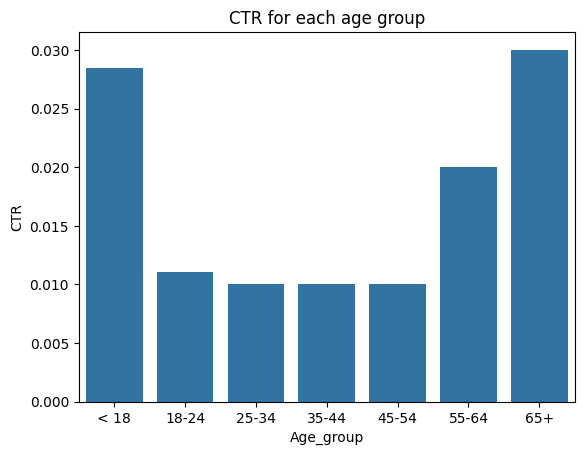

In [37]:
import matplotlib.pyplot as plt
def get_ctr(df):
    return df['Clicks'].sum() / float(df['Impressions'].sum())

ctrdf = df.groupby('Age_group').apply(get_ctr).reset_index(name = 'CTR')
plot = sns.barplot(x = 'Age_group', y = 'CTR', data = ctrdf, order = ['< 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
plot.set(title = 'CTR for each age group')
plt.show()

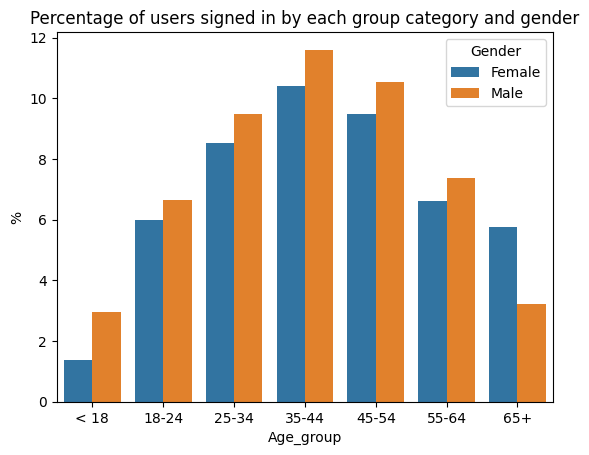

In [38]:
signed_indf = df
signed_indf['%'] = (df['Signed_In'] / df['Signed_In'].sum()) * 100
signed_indfnew = signed_indf.groupby(['Age_group', 'Gender'])['%'].sum().reset_index()
plotSigned_In = sns.barplot(x = 'Age_group', y = '%', hue = 'Gender', data = signed_indfnew, order = ['< 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
plotSigned_In.set(title = 'Percentage of users signed in by each group category and gender')
plt.show()

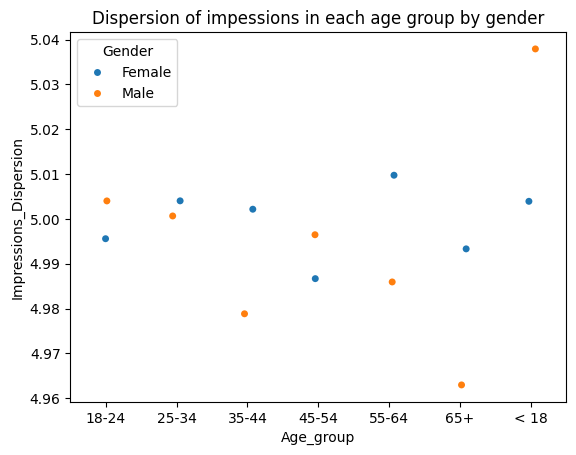

In [39]:
dispersion = df.groupby(['Age_group', 'Gender'])['Impressions'].var().reset_index(name = 'Impressions_Dispersion')
plot_dispersion = sns.stripplot(x = 'Age_group', y = 'Impressions_Dispersion', hue = 'Gender', data = dispersion)
plot_dispersion.set(title = 'Dispersion of impessions in each age group by gender')
plt.show()

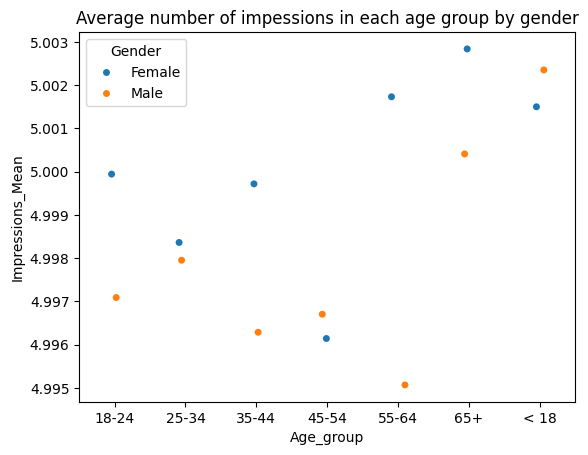

In [40]:
meanimp = df.groupby(['Age_group', 'Gender'])['Impressions'].mean().reset_index(name = 'Impressions_Mean')
plot_meanimp = sns.stripplot(x = 'Age_group', y = 'Impressions_Mean', hue = 'Gender', data = meanimp)
plot_meanimp.set(title = 'Average number of impessions in each age group by gender')
plt.show()

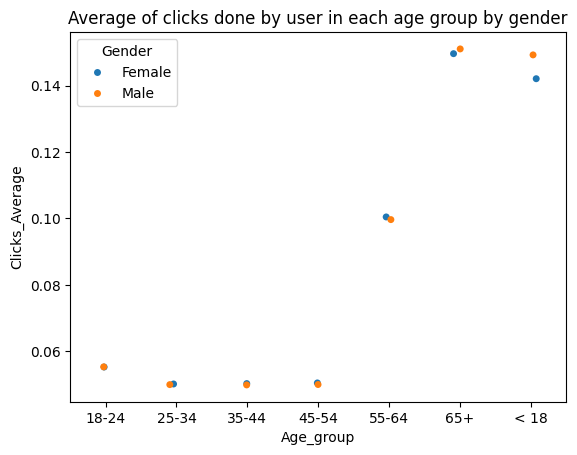

In [41]:
average = df.groupby(['Age_group', 'Gender'])['Clicks'].mean().reset_index(name = 'Clicks_Average')
plot_average = sns.stripplot(x = 'Age_group', y = 'Clicks_Average', hue = 'Gender', data = average)
plot_average.set(title = 'Average of clicks done by user in each age group by gender')
plt.show()

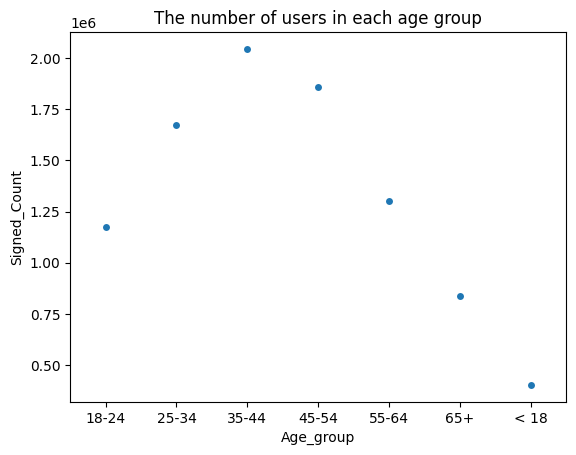

In [42]:
count = df.groupby('Age_group')['Signed_In'].sum().reset_index(name='Signed_Count')
plot_count = sns.stripplot(x = 'Age_group', y = 'Signed_Count', data = count)
plot_count.set(title = 'The number of users in each age group')
plt.show()

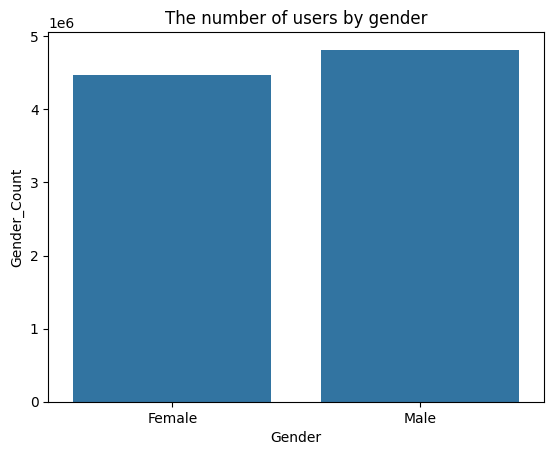

In [43]:
countgender = df.groupby('Gender')['Signed_In'].sum().reset_index(name='Gender_Count')
plot_count = sns.barplot(x = 'Gender', y = 'Gender_Count', data = countgender)
plot_count.set(title = 'The number of users by gender')
plt.show()